In [1]:
from scipy import ndimage
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
def cv_rgb2gray(rgb):
    gray = np.mean(rgb, axis=2)
    return gray

def cv_binarization(gray_img, threshold = 100):
    binarized = 1.0 * (gray_img > threshold)
    return binarized

def cv_opening(img, kernel, iter_erosion= 1, iter_dilatation = 1):
    img = cv2.erode(img, kernel, iter_erosion)
    img = cv2.dilate(img, kernel, iter_dilatation)
    return img

def cv_closing(img, kernel, iter_erosion= 1, iter_dilatation = 1):
    img = cv2.dilate(img, kernel, iter_dilatation)
    img = cv2.erode(img, kernel, iter_erosion)
    return img

def kernel_square(n):
    kernel  = np.ones((n, n),np.uint8)
    return kernel

def kernel_unique(n, m):
    kernel  = np.ones((n, m),np.uint8)
    return kernel

In [3]:
def view(img):
    plt.figure(figsize=(10, 10))
    plt.imshow(img, cmap='gray')

In [4]:
img = cv2.imread("./DATA/1.jpg")
img = img[500: 850, 100:375]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

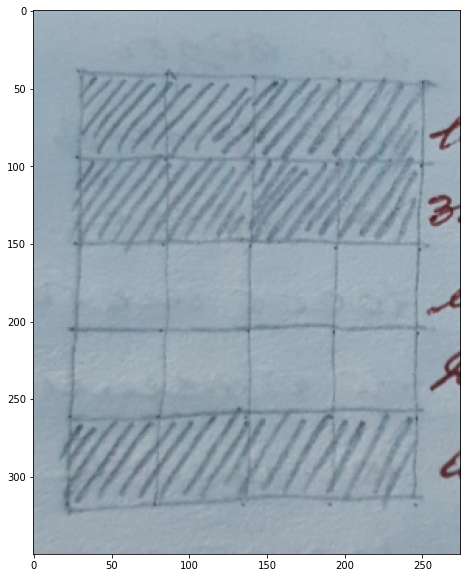

In [5]:
view(img)

In [6]:
blur = cv2.blur(gray, (3, 3))

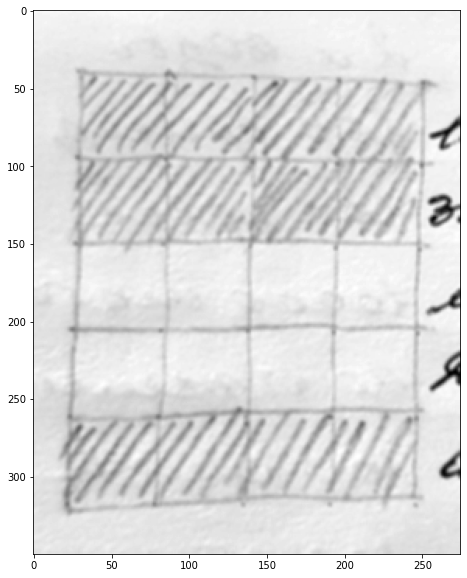

In [7]:
view(blur)

In [8]:
ret, otsu = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 

In [9]:
otsu = 255 - otsu

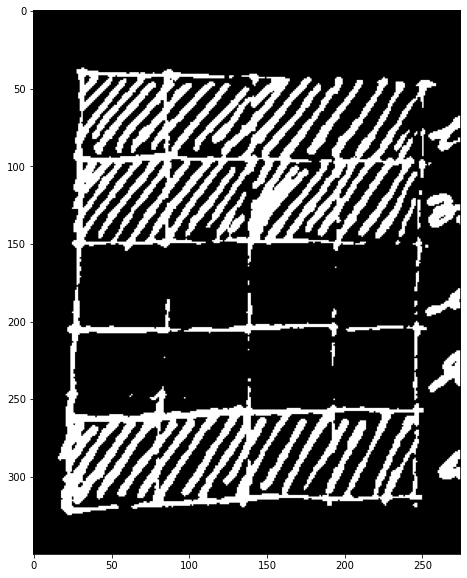

In [10]:
view(otsu)

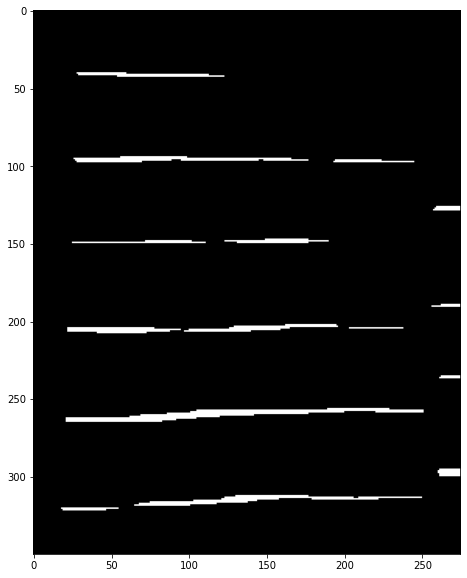

In [11]:
f1 = cv_opening(otsu, kernel=kernel_unique(1, 25))
view(f1)

In [12]:
rho, theta, thresh = 2, np.pi/180, 150
lines_h = cv2.HoughLines(f1, rho, theta, thresh)
new_lines_h = []

In [13]:
for line in lines_h:
    # rho Это дистанция до кординаты (center,center)
    # theta угол повората изображения
    rho, theta = line[0]
    # a нормирование 
    # b нормирование
    a = np.cos(theta)
    b = np.sin(theta)
    if b > 0.99 and a < 0.02:
        # кадинаты
        x0 = a * rho
        y0 = b * rho
        # начало вектора
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        # конец вектора
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        # Рисование 
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 255), 2)
        new_lines_h.append(line)

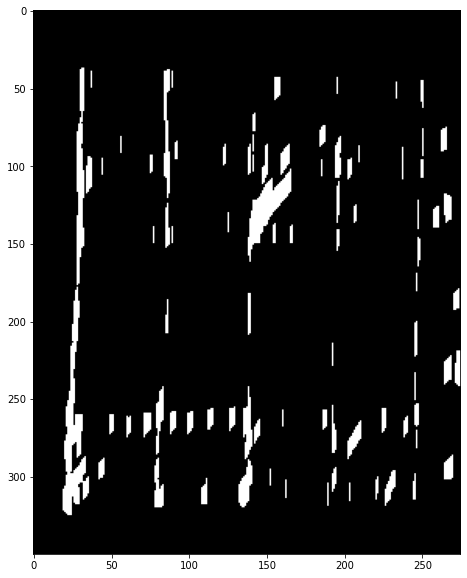

In [14]:
f2 = cv_opening(otsu, kernel=kernel_unique(11, 1))
view(f2)

In [15]:
rho, theta, thresh = 2, np.pi/180, 171
lines_v = cv2.HoughLines(f2, rho, theta, thresh)

In [16]:
for line in lines_v:
    # rho Это дистанция до кординаты (center,center)
    # theta угол повората изображения
    rho, theta = line[0]
    # a нормирование 
    # b нормирование
    a = np.cos(theta)
    b = np.sin(theta)
    if a > 0.99 and b < 0.02:
        # кадинаты
        x0 = a * rho
        y0 = b * rho
        # начало вектора
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        # конец вектора
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        # Рисование 
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 255), 2)

In [17]:
new_img = img.copy()

In [21]:
lines = np.concatenate((lines_h, lines_v), axis=0)

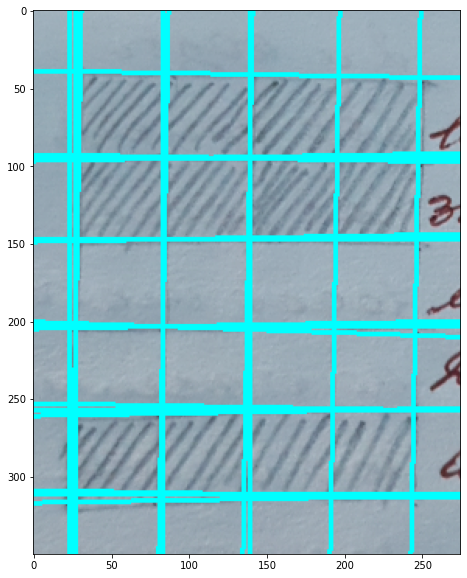

In [22]:
view(new_img)